In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/ML/innovation_lab

Mounted at /content/drive
/content/drive/MyDrive/ML/innovation_lab


In [2]:
import pandas as pd

src='/content/drive/MyDrive/ML/innovation_lab/Final_review_dataset.csv'
c_df=pd.read_csv(src,encoding='unicode_escape')

c_df=c_df.drop_duplicates(subset='Text', keep="last")
c_df=c_df.reset_index(drop=True)
c_df['Label'] = (c_df['Target']=='C').astype(int)
print(c_df)

const_list=[]
for i in range(len(c_df['Target'])):
  if c_df['Target'][i]=='C':
    const_list.append(i)
print(const_list)
print("total: {}\nconstructive:{} \nnon-constructive: {}\n".format(len(c_df['Target']),len(const_list),len(c_df['Target'])-len(const_list)))

                                                   Text Target  Label
0     I don't see how your approach has potential to...      N      0
1     It is a bit strange for me that authors have u...      C      1
2     The paper could be considered for acceptance g...      C      1
3     Reviewer 2: The proposal is also poorly writte...      N      0
4     The scientific contribution of this paper - if...      N      0
...                                                 ...    ...    ...
1491  The technical contribution is limited as it is...      N      0
1492  After reading the paper, I was confused whethe...      N      0
1493  â¦find one or two male biologists to work wit...      N      0
1494  The authors describe a framework of how to lea...      N      0
1495                 Ok but not good enough - rejection      N      0

[1496 rows x 3 columns]
[1, 2, 10, 11, 14, 16, 18, 37, 43, 44, 55, 57, 61, 63, 67, 80, 81, 82, 83, 84, 89, 99, 101, 104, 113, 138, 143, 147, 153, 158, 159, 160

In [3]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# original
n = 10

print(c_df['Text'][n])

# 1. lower case
c_df['clean'] = c_df['Text'].apply(lambda x: x.lower())

print("lower case: ",c_df['clean'][n])



# 2. expand contractions
contractions_dict = { "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will","they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not","what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", "where'd": "where did", "where've": "where have","who'll": "who will", "who'll've": "who will have", "who've": "who have", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
added_cont = {" sry ": " sorry ", " & ": " and ", " u ": " you ", " r ": " are ", " 1 ": " one ", " 2 ": " to ", " 4 ": " for ", " ur ": " you are ", " pls ": " please ", " txt ": " text ", "t&c": " terms and conditions ", " k ": " ok ", " msg ": " message "}
contractions_dict.update(added_cont)
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
c_df['clean']=c_df['clean'].apply(lambda x:expand_contractions(x))

print("expand contradictions: ", c_df['clean'][n])



# 3. rephrase text - replace url and email
#email-id
c_df['clean'] = c_df['clean'].apply(lambda x: re.sub('^\w*([!#$%&\'*+-/=?^_`{|]?\w*)*[@]{1}(\w+[.]{1})+\w*', ' emailadd ',x))
#url
c_df['clean'] = c_df['clean'].apply(lambda x:re.sub('((http[s]?\S+)|([w]{3}[.]\w+[.]\S*)|(\w+([.]\w+)*[.][a-z]{2,3}($|(/\S+)+)))', ' urladd ', x))
#phone number
c_df['clean'] = c_df['clean'].apply(lambda x: re.sub('(^\+|)([-]?\d+){4}\d', ' phoneadd ',x))

print("replace url and email: ", c_df['clean'][n])



# 4. remove punctuation
c_df['clean'] = c_df['clean'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))

print("remove punctuation: ", c_df['clean'][n])



# again expanding leftover contractions
c_df['clean']=c_df['clean'].apply(lambda x:expand_contractions(x))

print("expanding contractions: ", c_df['clean'][n])



# 5. remove words with digits
c_df['clean'] = c_df['clean'].apply(lambda x: re.sub('\S*\d+\S*',' ',x))

print("remove digits: ", c_df['clean'][n])


# 6(i). remove stopwords
'''
NOTE: Remove Stopwords only for TF-IDF (since it uses non-sequential data)
Word2Vec uses sequential data, so for W2V, DO NOT remove stopwords
'''
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
c_df['clean'] = c_df['clean'].apply(lambda x: remove_stopwords(x))



# 6(ii). lemmatisation
'''
lemmatization is better than stemming
'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
c_df['clean'] = c_df['clean'].apply(lambda text: lemmatize_words(text))

print("lemmatisation: ", c_df['clean'][n])



# 7. remove stopwords
'''
NOTE: Remove Stopwords only for TF-IDF (since it uses non-sequential data)
Word2Vec uses sequential data, so for W2V, DO NOT remove stopwords
'''
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
c_df['stop'] = c_df['clean'].apply(lambda x: remove_stopwords(x))

print("keep stopwords: ", c_df['clean'][n]) #for w2v
print("remove stopwords: ", c_df['stop'][n])  #for tfidf



# 8. removal of extra spaces
c_df['clean'] = c_df['clean'].apply(lambda x: re.sub(' +', ' ', x))
c_df['stop'] = c_df['stop'].apply(lambda x: re.sub(' +', ' ', x))

print(c_df['clean'][n])
print(c_df['stop'][n])



# 9. tokenization
import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
c_df['token_w2v'] = c_df['clean'].apply(lambda x: tokenization(x))
c_df['token_tfidf'] = c_df['stop'].apply(lambda x: tokenization(x))

print(c_df['token_w2v'][n])
print(c_df['token_tfidf'][n])




#word count
word_count_list=[]
for row in range(len(c_df['Text'])):
  word_count_list.append(len(c_df['Text'][row].split()))
c_df['word_count']=word_count_list
print(c_df['word_count'][n])



#keyword count
keyword_count_list=[]
for row in range(len(c_df['token_tfidf'])):
  keyword_count_list.append(len(c_df['token_tfidf'][row]))
c_df['keyword_count']=keyword_count_list
print(c_df['keyword_count'][n])


#POS count
def pos_count(text):
  noun_count=0
  adj_count=0
  verb_count=0
  adverb_count=0
  tokens = nltk.word_tokenize(text.lower())
  text = nltk.Text(tokens)
  tags = nltk.pos_tag(text)
  from collections import Counter
  counts = dict(Counter(tag for word,tag in tags))
  for i in list(counts.keys()):
    if i[0]=='N':
      noun_count+=counts[i]
    if i[0]=='J':
      adj_count+=counts[i]
    if i[0]=='V':
      verb_count+=counts[i]
    if i[0]=='R':
      adverb_count+=counts[i]
  return (noun_count, adj_count, verb_count, adverb_count)

noun_count_list=[]
adj_count_list=[]
verb_count_list=[]
adverb_count_list=[]
for row in range(len(c_df['Text'])):
  pos_tup=pos_count(c_df['Text'][row])
  noun_count_list.append(pos_tup[0])
  adj_count_list.append(pos_tup[1])
  verb_count_list.append(pos_tup[2])
  adverb_count_list.append(pos_tup[3])
c_df['noun_count']=noun_count_list
c_df['adj_count']=adj_count_list
c_df['verb_count']=verb_count_list
c_df['adverb_count']=adverb_count_list
print("({}, {}, {}, {})".format(c_df['noun_count'][n],c_df['adj_count'][n],c_df['verb_count'][n],c_df['adverb_count'][n]))



#VADER sentiment
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
	sid_obj = SentimentIntensityAnalyzer()
	sentiment_dict = sid_obj.polarity_scores(sentence)
	return sentiment_dict
c_df['neg'] = c_df['Text'].apply(lambda x: sentiment_scores(x)['neg'])
c_df['neu'] = c_df['Text'].apply(lambda x: sentiment_scores(x)['neu'])
c_df['pos'] = c_df['Text'].apply(lambda x: sentiment_scores(x)['pos'])
c_df['compound'] = c_df['Text'].apply(lambda x: sentiment_scores(x)['compound'])
print("({}, {}, {}, {})".format(c_df['neg'][n],c_df['neu'][n],c_df['pos'][n],c_df['compound'][n]))
senti_list=[]
for row in range(len(c_df['compound'])):
  if c_df['compound'][row]>=0.05:
    senti_list.append(2)
  elif c_df['compound'][row]<=-0.05:
    senti_list.append(0)
  else:
    senti_list.append(1)
c_df['sentiment']=senti_list
print(c_df['sentiment'][n])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
The applicant does not address the broader impacts of the proposal, other than its potential benefit to global human health.
lower case:  the applicant does not address the broader impacts of the proposal, other than its potential benefit to global human health.
expand contradictions:  the applicant does not address the broader impacts of the proposal, other than its potential benefit to global human health.
replace url and email:  the applicant does not address the broader impacts of the proposal, other than 

In [4]:
c_df

,Text,Target,Label,clean,stop,token_w2v,token_tfidf,word_count,keyword_count,noun_count,adj_count,verb_count,adverb_count,neg,neu,pos,compound,sentiment
0,I don't see how your approach has potential to...,N,0,see approach potential shed light question any...,see approach potential shed light question any...,"[see, approach, potential, shed, light, questi...","[see, approach, potential, shed, light, questi...",18,8,5,1,5,1,0.000,1.000,0.000,0.0000,1
1,It is a bit strange for me that authors have u...,C,1,bit strange author used python statistical ana...,bit strange author used python statistical ana...,"[bit, strange, author, used, python, statistic...","[bit, strange, author, used, python, statistic...",24,13,7,3,4,1,0.069,0.843,0.088,0.1280,2
2,The paper could be considered for acceptance g...,C,1,paper could considered acceptance given rewrit...,paper could considered acceptance given rewrit...,"[paper, could, considered, acceptance, given, ...","[paper, could, considered, acceptance, given, ...",20,10,7,0,3,0,0.000,0.864,0.136,0.4588,2
3,Reviewer 2: The proposal is also poorly writte...,N,0,reviewer proposal also poorly written unfocuse...,reviewer proposal also poorly written unfocuse...,"[reviewer, proposal, also, poorly, written, un...","[reviewer, proposal, also, poorly, written, un...",17,10,4,3,3,2,0.130,0.721,0.149,0.1027,2
4,The scientific contribution of this paper - if...,N,0,scientific contribution paper best hopelessly ...,scientific contribution paper best hopelessly ...,"[scientific, contribution, paper, best, hopele...","[scientific, contribution, paper, best, hopele...",19,6,2,2,2,2,0.217,0.620,0.163,-0.1027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,The technical contribution is limited as it is...,N,0,technical contribution limited build old idea ...,technical contribution limited build old idea ...,"[technical, contribution, limited, build, old,...","[technical, contribution, limited, build, old,...",28,15,5,4,8,1,0.066,0.934,0.000,-0.2263,0
1492,"After reading the paper, I was confused whethe...",N,0,reading paper confused whether critique paper ...,reading paper confused whether critique paper ...,"[reading, paper, confused, whether, critique, ...","[reading, paper, confused, whether, critique, ...",15,7,4,0,4,0,0.141,0.859,0.000,-0.3182,0
1493,â¦find one or two male biologists to work wit...,N,0,â¦find one two male biologist work least obta...,â¦find one two male biologist work least obta...,"[â, find, one, two, male, biologist, work, lea...","[â, find, one, two, male, biologist, work, lea...",48,32,9,7,7,6,0.000,0.861,0.139,0.8126,2
1494,The authors describe a framework of how to lea...,N,0,author describe framework learn fair demograph...,author describe framework learn fair demograph...,"[author, describe, framework, learn, fair, dem...","[author, describe, framework, learn, fair, dem...",30,16,7,3,7,1,0.000,0.767,0.233,0.8020,2


In [5]:
c_word=[]
n_word=[]
for row in range(len(c_df['Target'])):
  if c_df['Target'][row]=='C':
    c_word.append(c_df['word_count'][row])
  elif c_df['Target'][row]=='N':
    n_word.append(c_df['word_count'][row])

avg_word=sum(c_df['word_count'])/len(c_df['word_count'])
avg_c=sum(c_word)/len(c_word)
avg_n=sum(n_word)/len(n_word)

print("avg word count: {} \navg const word count: {} \navg non-const word count: {}".format(avg_word,avg_c,avg_n))

avg word count: 19.455882352941178 
avg const word count: 21.2109479305741 
avg non-const word count: 17.69611780455154


In [6]:
toxic_df=pd.read_csv('/content/drive/MyDrive/ML/innovation_lab/toxicbert.csv')
toxic_df=toxic_df.drop_duplicates(subset='Text', keep="last")
toxic_df=toxic_df.reset_index(drop=True)
toxic_arr=(toxic_df[['toxicity','severe_toxicity','obscene','threat','insult','identity_attack']].copy()).to_numpy()
toxic_df

,Text,Target,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,I don't see how your approach has potential to...,N,0.000590,0.000128,0.000181,0.000131,0.000179,0.000146
1,It is a bit strange for me that authors have u...,C,0.000579,0.000125,0.000175,0.000134,0.000178,0.000143
2,The paper could be considered for acceptance g...,C,0.000510,0.000141,0.000194,0.000139,0.000184,0.000152
3,Reviewer 2: The proposal is also poorly writte...,N,0.000629,0.000122,0.000175,0.000127,0.000185,0.000145
4,The scientific contribution of this paper - if...,N,0.000744,0.000114,0.000173,0.000118,0.000188,0.000146
...,...,...,...,...,...,...,...,...
1511,"In particular, the assumption that every token...",C,0.000702,0.000116,0.000172,0.000124,0.000180,0.000144
1512,This is obviously written by a group from a lo...,N,0.000592,0.000125,0.000177,0.000126,0.000182,0.000140
1513,The main weakness of this paper is that it doe...,C,0.003782,0.000092,0.000247,0.000141,0.000267,0.000201
1514,"This person works for an NGO, you shouldn't be...",N,0.000903,0.000107,0.000162,0.000123,0.000176,0.000149


['see approach potential shed light question anyone might', 'bit strange author used python statistical analysis instead spss matlab usual please explain', 'paper could considered acceptance given rewrite paper change title abstract', 'reviewer proposal also poorly written unfocused brief moment meritorious thinking', 'scientific contribution paper best hopelessly insignificant'] 
 [0, 1, 1, 0, 0]
8315 ['bit', 'strange', 'author', 'used', 'python', 'statistical', 'analysis', 'instead', 'spss', 'matlab', 'usual', 'please', 'explain', 'paper', 'could', 'considered', 'acceptance', 'given', 'rewrite', 'paper', 'change', 'title', 'abstract', 'applicant', 'address', 'broader', 'impact', 'proposal', 'potential', 'benefit', 'global', 'human', 'health', 'major', 'concern', 'accept', 'work', 'progress', 'paper', 'finding', 'super', 'interesting', 'reader', 'opinion', 'work', 'antithetical', 'spirit', 'xx', 'research', 'impede', 'potentially', 'important', 'development', 'however', 'bad', 'langua

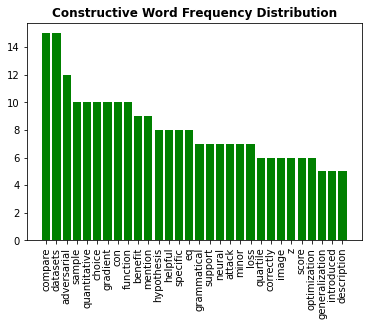

1253 {'worst': 8, 'left': 7, 'rarely': 6, 'jargon': 6, 'criticism': 6, 'chance': 5, 'yes': 5, 'exercise': 5, 'assessment': 5, 'couple': 5, 'career': 5, 'publishable': 5, 'except': 5, 'giving': 5, 'doubt': 5, 'merit': 5, 'fundamental': 4, 'pick': 4, 'enthusiasm': 4, 'sometimes': 4, 'critical': 4, 'ground': 4, 'anywhere': 4, 'movie': 4, 'annoying': 4, 'air': 4, 'submit': 4, 'soon': 4, 'undertake': 4, 'copied': 4, 'hide': 4, 'semblance': 4, 'misunderstanding': 4, 'greatest': 4, 'naive': 4, 'straightforward': 4, 'â\x80\x9d': 4, 'confuse': 4, 'pointing': 3, 'personally': 3, 'finished': 3, 'reflects': 3, 'sign': 3, 'claiming': 3, 'fool': 3, 'response': 3, 'considering': 3, 'blown': 3, 'respond': 3, 'tortuous': 3, 'inappropriate': 3, 'product': 3, 'xy': 3, 'utterly': 3, 'astronomy': 3, 'ended': 3, 'offensive': 3, 'wise': 3, 'clever': 3, 'pi': 3, 'joke': 3, 'pedestrian': 3, 'simulation': 3, 'proud': 3, 'brain': 3, 'ironic': 3, 'command': 3, 'worm': 3, 'disappointed': 3, 'program': 3, 'repeated

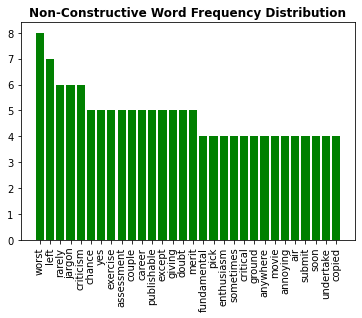

In [7]:
import operator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

#NUMBER OF WORDS IN DISTRIBUTION
n=30


sentence_list = c_df['clean'].to_list()
labels_list = c_df['Label'].to_list()
print(sentence_list[:5],"\n",labels_list[:5])

c_list=[]
n_list=[]

for i in range(len(labels_list)):
  if int(labels_list[i])==1:
    c_list.append(sentence_list[i])
  if int(labels_list[i])==0:
    n_list.append(sentence_list[i])

const=((" ").join(c_list)).split()
nconst=((" ").join(n_list)).split()

print(len(const), const,"\n", len(nconst), nconst)

c_dic={}
n_dic={}

for word in const:
  if word not in c_dic:
    c_dic[word]=1
  else:
    c_dic[word]+=1
c_sort = dict( sorted(c_dic.items(), key=operator.itemgetter(1),reverse=True))
print(len(c_sort),c_sort)


for word in nconst:
  if word not in n_dic:
    n_dic[word]=1
  else:
    n_dic[word]+=1
n_sort = dict( sorted(n_dic.items(), key=operator.itemgetter(1),reverse=True))
print(len(n_sort),n_sort)


w_all=const+nconst
print(len(w_all),w_all)

w_corp=[]
for word in w_all:
  if word not in w_corp:
    w_corp.append(word)
print(len(w_corp),w_corp)

wc=[]
wn=[]

for word in w_corp:
  if word in const and word not in nconst:
    wc.append(word)
  if word in nconst and word not in const:
    wn.append(word)

print(len(wc),wc,'\n',len(wn),wn)

c_dic_new={}
n_dic_new={}
c_words=[]
n_words=[]

for word in const:
  if word in wc:
    c_words.append(word)
    if word not in c_dic_new:
      c_dic_new[word]=1
    else:
      c_dic_new[word]+=1
c_sort_new = dict( sorted(c_dic_new.items(), key=operator.itemgetter(1),reverse=True))
print(len(c_sort_new),c_sort_new)
p1=plt.bar(list(c_sort_new.keys())[:n], list(c_sort_new.values())[:n], width=0.8, color='g')
plt.xticks(rotation='vertical')
plt.title("Constructive Word Frequency Distribution",fontweight='bold')
plt.show()

for word in nconst:
  if word in wn:
    n_words.append(word)
    if word not in n_dic_new:
      n_dic_new[word]=1
    else:
      n_dic_new[word]+=1
n_sort_new = dict( sorted(n_dic_new.items(), key=operator.itemgetter(1),reverse=True))
print(len(n_sort_new),n_sort_new)
p2=plt.bar(list(n_sort_new.keys())[:n], list(n_sort_new.values())[:n], width=0.8, color='g')
plt.xticks(rotation='vertical')
plt.title("Non-Constructive Word Frequency Distribution",fontweight='bold')
plt.show()



CONSTRUCTIVE
             words  count
0          compare     15
1         datasets     15
2           sample     10
3     quantitative     10
4         gradient     10
5              con     10
6         function     10
7          benefit      9
8          mention      9
9       hypothesis      8
10         helpful      8
11        specific      8
12     grammatical      7
13         support      7
14          neural      7
15          attack      7
16           minor      7
17            loss      7
18        quartile      6
19       correctly      6
20           image      6
21           score      6
22    optimization      6
23  generalization      5
24      introduced      5
25     description      5
26     terminology      5
27             map      5
28            cost      5
29        variance      5


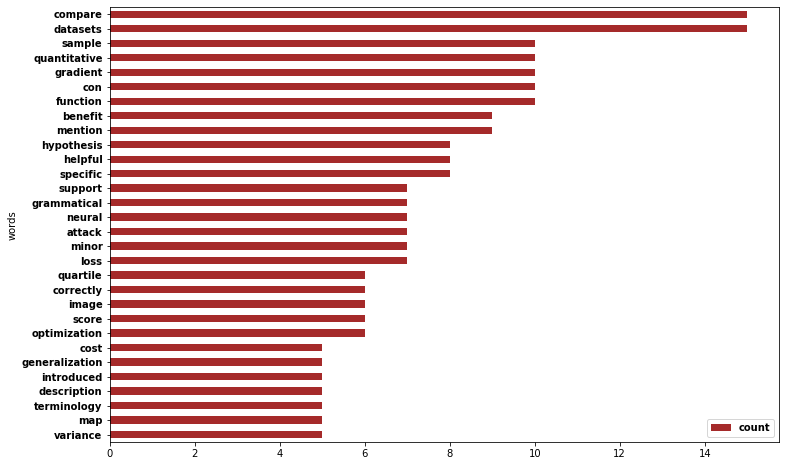



NON-CONSTRUCTIVE
               words  count
0              worst      8
1             jargon      6
2             career      5
3              merit      5
4         enthusiasm      4
5              movie      4
6           annoying      4
7             copied      4
8               hide      4
9   misunderstanding      4
10             naive      4
11   straightforward      4
12           confuse      4
13        personally      3
14          claiming      3
15              fool      3
16             blown      3
17          tortuous      3
18     inappropriate      3
19           utterly      3
20         astronomy      3
21         offensive      3
22              wise      3
23            clever      3
24              joke      3
25        pedestrian      3
26             proud      3
27             brain      3
28            ironic      3
29           command      3


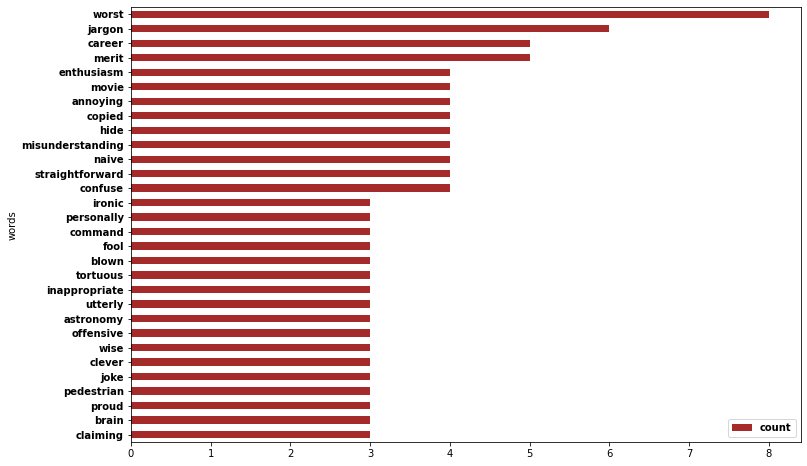

In [8]:
from collections import Counter

c_nwords=['relatively','choice','z','adversarial','eq','xxx', 'nutshell', 'p', 'silly', 'death', 'live', 'flung', 'strange', 'howler', 'bubblegum', 'us', 'step', 'thus', 'used','ass','third']
n_nwords=['sign','product','xy','men','doubt','criticism','submit','soon','pi','semblance','greatest','reflects','response','considering','person','critical','except','sometimes','anywhere','ground','chance','assessment','fundamental','â','gap','bind','started','potentially','overtaking','opening','advance','couple','competent','span','bridge','uncharted','finished','searched','originally','longer','performed','exercise','experience','left','yes','turn','got','revise','land','else','researcher', 'air', 'social', 'publishable', 'alternative', 'undertake', 'rarely', 'among', 'top', 'missed', 'simulation', 'learn', 'pick', 'zero', 'respond', 'ended', 'comma', 'start', 'strength', 'degree', 'together', 'course', 'spend', 'pointing', 'total', 'credibility', 'positively', 'unaware', 'expended', 'hoping', 'supportive', 'list', 'institution', 'giving', 'qualified', 'accurately', 'thrown', 'handwritten', 'strip']


cnt = Counter()
n=30

print("\n\nCONSTRUCTIVE")
for text in c_words: 
  if text not in c_nwords:
    cnt[text] += 1
cnt.most_common(n)

import pandas as pd
word_freq = pd.DataFrame(cnt.most_common(n),
                             columns=['words', 'count'])
print(word_freq.head(n))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

cmap = plt.cm.get_cmap('hsv', n)
# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
plt.yticks(weight='bold')
plt.legend(prop=dict(weight='bold'))
# ax.set_title("Constructive Word Frequency Distribution (Unique)",fontweight='bold')
plt.show()


cnt = Counter()
n=30

print("\n\nNON-CONSTRUCTIVE")
for text in n_words:
  if text not in n_nwords:
    cnt[text] += 1
# See most common ten words
cnt.most_common(n)

import pandas as pd
word_freq = pd.DataFrame(cnt.most_common(n),
                             columns=['words', 'count'])
print(word_freq.head(n))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

cmap = plt.cm.get_cmap('hsv', n)
# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color='brown')
plt.yticks(weight='bold')
plt.legend(prop=dict(weight='bold'))
# ax.set_title("Non-Constructive Word Frequency Distribution (Unique)",fontweight='bold')
plt.show()

In [9]:
c_df['toxicity']=list(toxic_df['toxicity'])[:len(c_df['Text'])]
c_df['severe_toxicity']=list(toxic_df['severe_toxicity'])[:len(c_df['Text'])]
c_df['obscene']=list(toxic_df['obscene'])[:len(c_df['Text'])]
c_df['threat']=list(toxic_df['threat'])[:len(c_df['Text'])]
c_df['insult']=list(toxic_df['insult'])[:len(c_df['Text'])]
c_df['identity_attack']=list(toxic_df['identity_attack'])[:len(c_df['Text'])]
c_df

,Text,Target,Label,clean,stop,token_w2v,token_tfidf,word_count,keyword_count,noun_count,...,neu,pos,compound,sentiment,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,I don't see how your approach has potential to...,N,0,see approach potential shed light question any...,see approach potential shed light question any...,"[see, approach, potential, shed, light, questi...","[see, approach, potential, shed, light, questi...",18,8,5,...,1.000,0.000,0.0000,1,0.000590,0.000128,0.000181,0.000131,0.000179,0.000146
1,It is a bit strange for me that authors have u...,C,1,bit strange author used python statistical ana...,bit strange author used python statistical ana...,"[bit, strange, author, used, python, statistic...","[bit, strange, author, used, python, statistic...",24,13,7,...,0.843,0.088,0.1280,2,0.000579,0.000125,0.000175,0.000134,0.000178,0.000143
2,The paper could be considered for acceptance g...,C,1,paper could considered acceptance given rewrit...,paper could considered acceptance given rewrit...,"[paper, could, considered, acceptance, given, ...","[paper, could, considered, acceptance, given, ...",20,10,7,...,0.864,0.136,0.4588,2,0.000510,0.000141,0.000194,0.000139,0.000184,0.000152
3,Reviewer 2: The proposal is also poorly writte...,N,0,reviewer proposal also poorly written unfocuse...,reviewer proposal also poorly written unfocuse...,"[reviewer, proposal, also, poorly, written, un...","[reviewer, proposal, also, poorly, written, un...",17,10,4,...,0.721,0.149,0.1027,2,0.000629,0.000122,0.000175,0.000127,0.000185,0.000145
4,The scientific contribution of this paper - if...,N,0,scientific contribution paper best hopelessly ...,scientific contribution paper best hopelessly ...,"[scientific, contribution, paper, best, hopele...","[scientific, contribution, paper, best, hopele...",19,6,2,...,0.620,0.163,-0.1027,0,0.000744,0.000114,0.000173,0.000118,0.000188,0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,The technical contribution is limited as it is...,N,0,technical contribution limited build old idea ...,technical contribution limited build old idea ...,"[technical, contribution, limited, build, old,...","[technical, contribution, limited, build, old,...",28,15,5,...,0.934,0.000,-0.2263,0,0.000633,0.000123,0.000170,0.000134,0.000178,0.000147
1492,"After reading the paper, I was confused whethe...",N,0,reading paper confused whether critique paper ...,reading paper confused whether critique paper ...,"[reading, paper, confused, whether, critique, ...","[reading, paper, confused, whether, critique, ...",15,7,4,...,0.859,0.000,-0.3182,0,0.000551,0.000132,0.000188,0.000127,0.000179,0.000145
1493,â¦find one or two male biologists to work wit...,N,0,â¦find one two male biologist work least obta...,â¦find one two male biologist work least obta...,"[â, find, one, two, male, biologist, work, lea...","[â, find, one, two, male, biologist, work, lea...",48,32,9,...,0.861,0.139,0.8126,2,0.000899,0.000105,0.000173,0.000109,0.000192,0.000151
1494,The authors describe a framework of how to lea...,N,0,author describe framework learn fair demograph...,author describe framework learn fair demograph...,"[author, describe, framework, learn, fair, dem...","[author, describe, framework, learn, fair, dem...",30,16,7,...,0.767,0.233,0.8020,2,0.000627,0.000121,0.000167,0.000124,0.000179,0.000151


In [10]:
c_df.to_csv('/content/drive/MyDrive/ML/innovation_lab/final_review_dataframe.csv',index=False)

In [11]:
print(list(c_df.columns))

['Text', 'Target', 'Label', 'clean', 'stop', 'token_w2v', 'token_tfidf', 'word_count', 'keyword_count', 'noun_count', 'adj_count', 'verb_count', 'adverb_count', 'neg', 'neu', 'pos', 'compound', 'sentiment', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']




 word_count


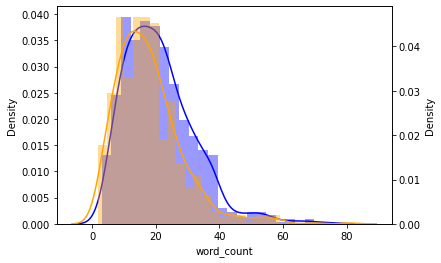

word_count constructive (BLUE): 21.2109479305741
word_count non-constructive (ORANGE): 17.69611780455154
constructive




 keyword_count


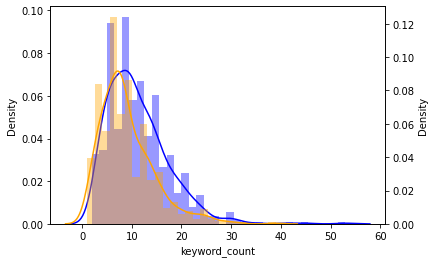

keyword_count constructive (BLUE): 11.177570093457945
keyword_count non-constructive (ORANGE): 9.036144578313253
constructive




 noun_count


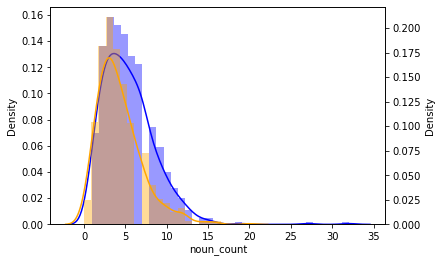

noun_count constructive (BLUE): 5.409879839786382
noun_count non-constructive (ORANGE): 4.326639892904953
constructive




 adj_count


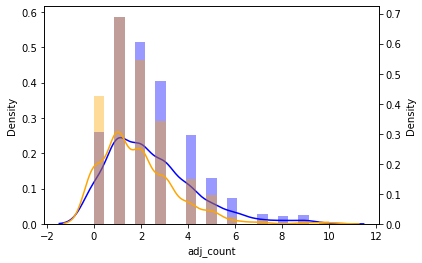

adj_count constructive (BLUE): 2.411214953271028
adj_count non-constructive (ORANGE): 1.859437751004016
constructive




 verb_count


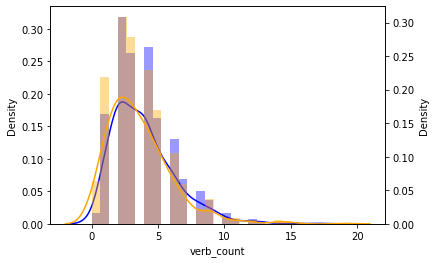

verb_count constructive (BLUE): 3.8945260347129507
verb_count non-constructive (ORANGE): 3.5555555555555554
constructive




 adverb_count


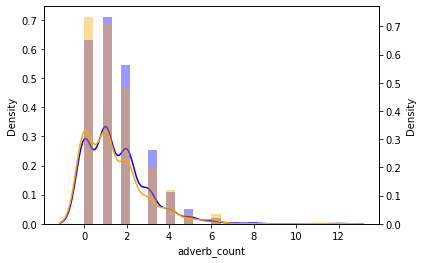

adverb_count constructive (BLUE): 1.5020026702269693
adverb_count non-constructive (ORANGE): 1.4016064257028114
constructive




 neg


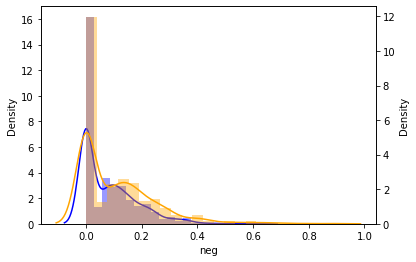

neg constructive (BLUE): 0.07951668891855802
neg non-constructive (ORANGE): 0.1075809906291835
non_constructive




 neu


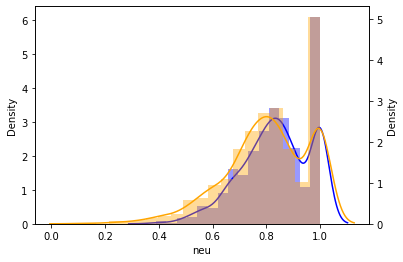

neu constructive (BLUE): 0.8356275033377829
neu non-constructive (ORANGE): 0.8040414993306555
constructive




 pos


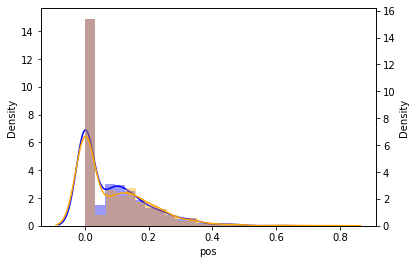

pos constructive (BLUE): 0.0848424566088118
pos non-constructive (ORANGE): 0.0883547523427042
non_constructive




 compound


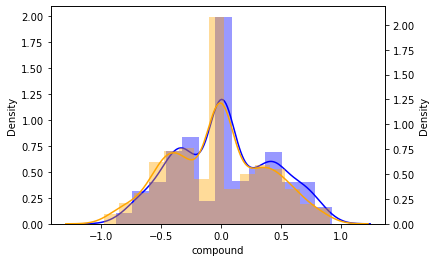

compound constructive (BLUE): 0.02418811748998664
compound non-constructive (ORANGE): -0.03312784471218209
constructive




 sentiment


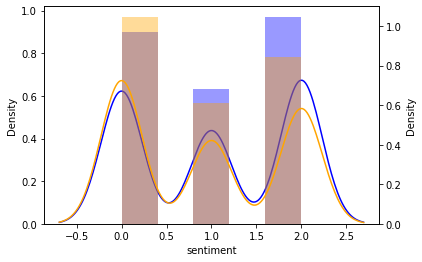

sentiment constructive (BLUE): 1.0293724966622162
sentiment non-constructive (ORANGE): 0.9183400267737617
constructive




 toxicity


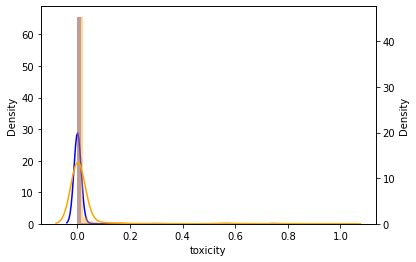

toxicity constructive (BLUE): 0.005846810638477977
toxicity non-constructive (ORANGE): 0.02137314960627845
non_constructive




 severe_toxicity


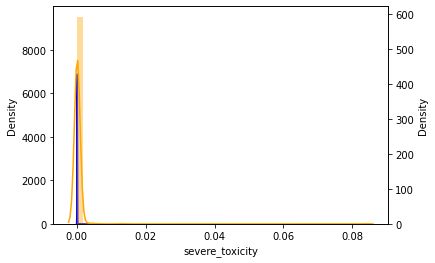

severe_toxicity constructive (BLUE): 0.0001357054372162887
severe_toxicity non-constructive (ORANGE): 0.00029147093092503346
non_constructive




 obscene


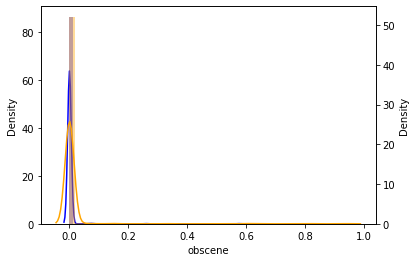

obscene constructive (BLUE): 0.0015248775083578114
obscene non-constructive (ORANGE): 0.005572006722610445
non_constructive




 threat


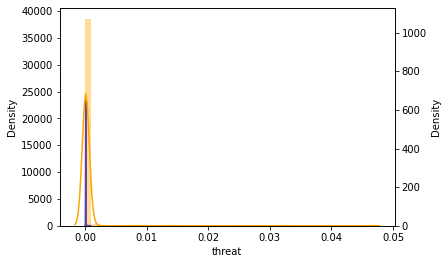

threat constructive (BLUE): 0.00013217784882510006
threat non-constructive (ORANGE): 0.00028827486590896924
non_constructive




 insult


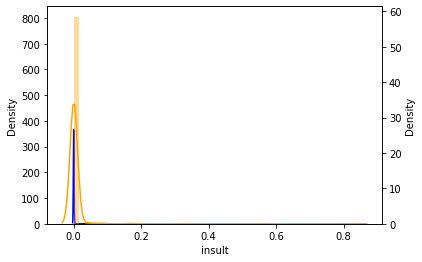

insult constructive (BLUE): 0.0005662791163551402
insult non-constructive (ORANGE): 0.004679222905863452
non_constructive




 identity_attack


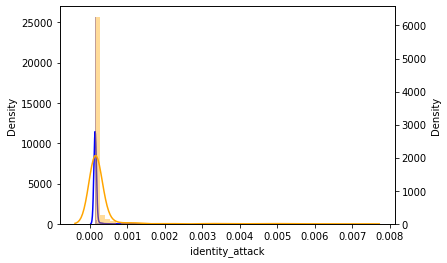

identity_attack constructive (BLUE): 0.00016106300238985313
identity_attack non-constructive (ORANGE): 0.00028361115724230275
non_constructive




In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline

for i in list(c_df.columns)[7:]:
  print('\n\n',i)
  fig, ax = plt.subplots()
  for x in ["N", "C"]:
    subset = c_df[c_df['Target'] == x]
    # Draw the density plot
    if x=="C":
        label_plt="Constructive reviews"
        plotc=sns.distplot(subset[i], hist=True, label=label_plt,ax=ax, color='blue')
    else:
        label_plt="Non-Constructive reviews"
        ax2 = ax.twinx()
        plotn=sns.distplot(subset[i], hist=True, label=label_plt,ax=ax2, color='orange')
  plt.show(sns)
  c_count=0
  c_avg=0
  n_count=0
  n_avg=0

  for j in range(len(c_df[i])):
    if c_df['Target'][j]=='C':
      c_count+=1
      c_avg+=c_df[i][j]
    elif c_df['Target'][j]=='N':
      n_count+=1
      n_avg+=c_df[i][j]
  c_avg/=c_count
  n_avg/=n_count
  print("{} constructive (BLUE): {}\n{} non-constructive (ORANGE): {}".format(i, c_avg, i, n_avg))
  if c_avg<n_avg:
    print('non_constructive\n\n')
  elif c_avg>n_avg:
    print('constructive\n\n')
  else:
    print('equal\n\n')

0.02418811748998664 -0.03312784471218209


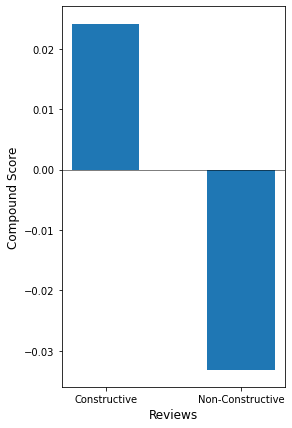

In [13]:
import numpy as np
import matplotlib.pyplot as plt

c_count=0
c_avg=0
n_count=0
n_avg=0
for j in range(len(c_df['compound'])):
  if c_df['Target'][j]=='C':
    c_count+=1
    c_avg+=c_df['compound'][j]
  elif c_df['Target'][j]=='N':
    n_count+=1
    n_avg+=c_df['compound'][j]
c_avg/=c_count
n_avg/=n_count
print(c_avg, n_avg)


# creating the dataset
data = {'Constructive':c_avg, 'Non-Constructive':n_avg}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (4,7))

# creating the bar plot
plt.bar(courses, values, width = 0.5)

plt.xlabel("Reviews", fontsize=12)
plt.ylabel("Compound Score", fontsize=12)
plt.axhline(0, color='black',lw=0.5)
plt.show()